In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve, auc

In [3]:
#load the dataset.
df=pd.read_csv("/content/drive/MyDrive/BIA/PYTHON/data set/new_train.csv")


#EDA

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [5]:
df.sample(n=5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
28177,36,management,married,university.degree,no,no,no,cellular,jun,mon,200,4,999,0,nonexistent,yes
25237,29,technician,single,professional.course,no,no,no,cellular,aug,tue,168,2,999,0,nonexistent,no
19654,21,blue-collar,married,basic.9y,no,no,no,cellular,jul,wed,160,1,999,0,nonexistent,no
29992,30,admin.,single,university.degree,no,no,no,cellular,jun,fri,275,1,999,0,nonexistent,yes
21602,37,services,married,high.school,unknown,yes,no,telephone,jun,tue,146,3,999,0,nonexistent,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [9]:
#we don't have any null values which is good for model.

In [10]:
df['age'].value_counts()

31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64

In [11]:
df['job'].value_counts()

admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [12]:
df['marital'].value_counts()

married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64

In [13]:
df['education'].value_counts()

university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64

In [14]:
df['default'].value_counts()

no         26007
unknown     6940
yes            3
Name: default, dtype: int64

In [15]:
df['housing'].value_counts()

yes        17254
no         14900
unknown      796
Name: housing, dtype: int64

In [16]:
df['loan'].value_counts()

no         27131
yes         5023
unknown      796
Name: loan, dtype: int64

In [17]:
df['month'].value_counts()

may    11011
jul     5763
aug     4948
jun     4247
nov     3266
apr     2085
oct      587
sep      464
mar      436
dec      143
Name: month, dtype: int64

In [18]:
df['day_of_week'].value_counts()

thu    6857
mon    6812
wed    6515
tue    6444
fri    6322
Name: day_of_week, dtype: int64

In [19]:
df['duration'].value_counts()

90      147
124     139
136     138
85      137
97      133
       ... 
1285      1
2203      1
1848      1
1248      1
1434      1
Name: duration, Length: 1467, dtype: int64

In [20]:
df['campaign'].value_counts()

1     14121
2      8469
3      4300
4      2116
5      1255
6       773
7       493
8       329
9       220
10      187
11      142
12       92
13       74
14       52
17       51
15       45
16       42
18       27
20       22
21       20
19       16
22       13
24       12
23       12
27        9
25        8
26        7
31        7
29        7
28        6
30        6
35        4
33        3
43        2
32        2
42        2
34        1
37        1
40        1
56        1
Name: campaign, dtype: int64

In [21]:
df['pdays'].value_counts()

999    31724
3        355
6        337
4         97
2         52
7         47
9         45
10        43
12        40
5         40
13        28
1         22
11        21
15        21
14        18
8         14
0         12
16         9
17         8
18         6
22         3
19         2
21         2
27         1
25         1
20         1
26         1
Name: pdays, dtype: int64

In [22]:
df['previous'].value_counts()

0    28416
1     3673
2      606
3      175
4       60
5       14
6        5
7        1
Name: previous, dtype: int64

In [23]:
df['poutcome'].value_counts()

nonexistent    28416
failure         3429
success         1105
Name: poutcome, dtype: int64

In [24]:
#we can see there are some column which have 'unknown' value.So we replace them with mode value of that particular column.

In [25]:
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [26]:
df.shape

(32950, 16)

In [27]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [28]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


<ipython-input-30-fb585e686c45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

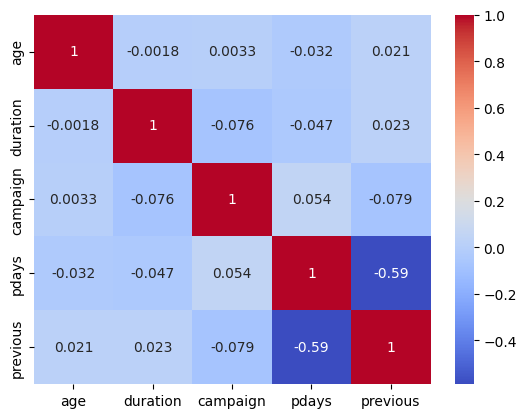

In [30]:
#we check correlation between columns using heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')


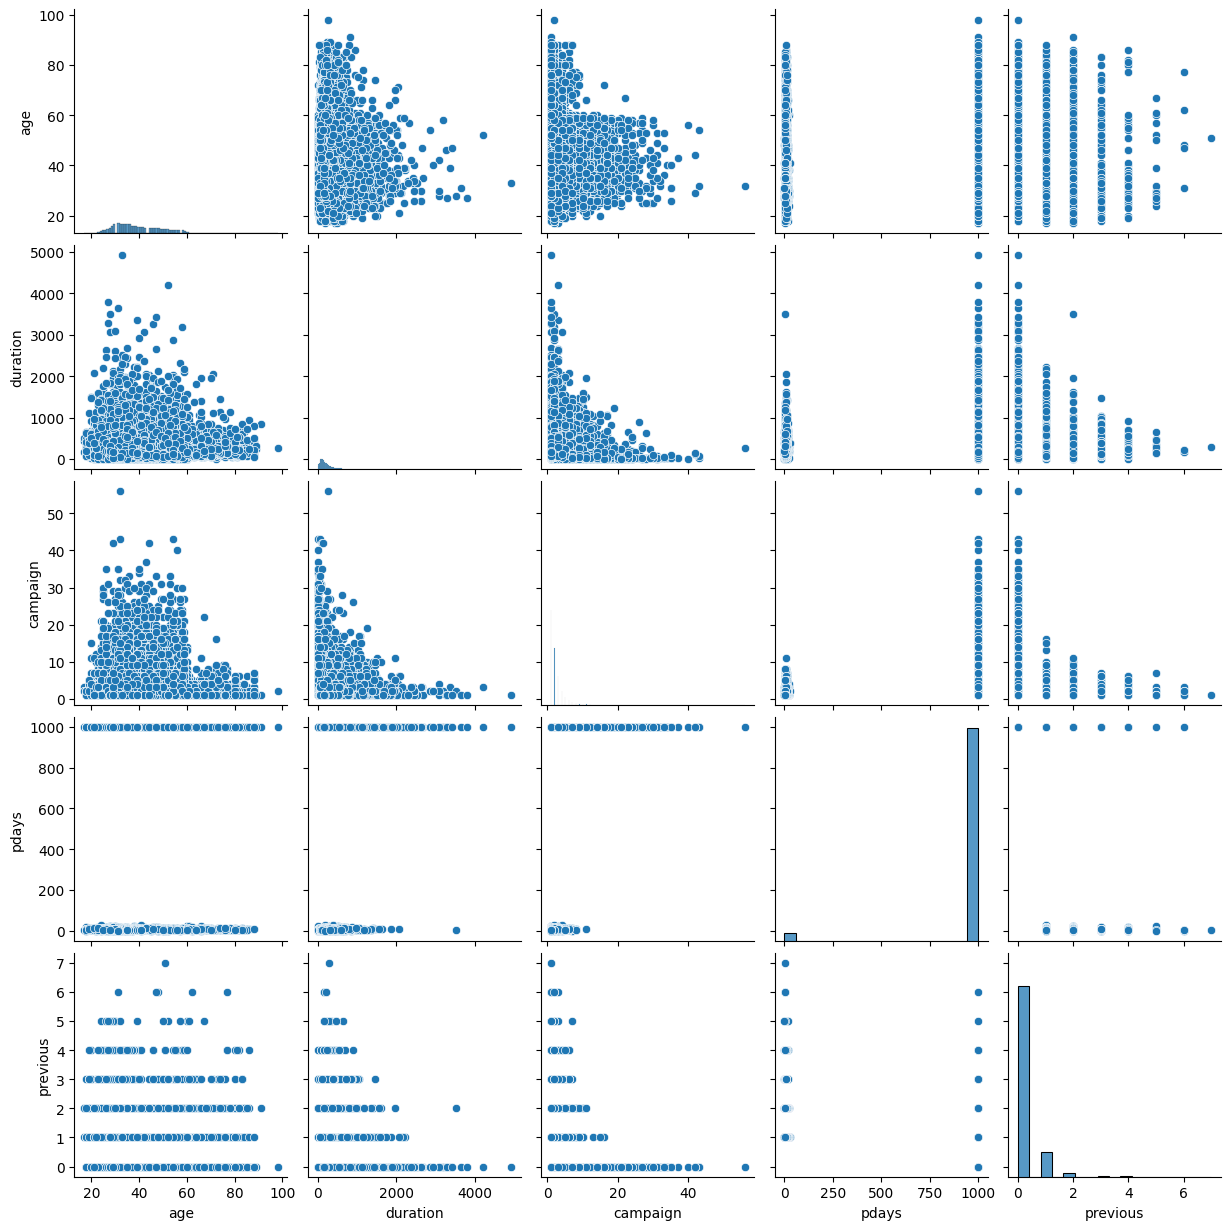

In [31]:
sns.pairplot(df)

<Axes: >

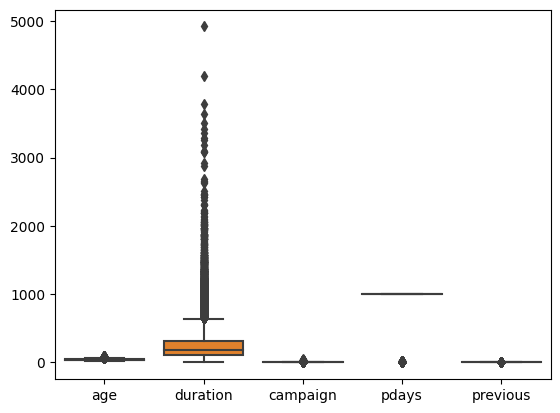

In [32]:

sns.boxplot(df)

#Pre-Processing

In [33]:
df['job'].mode()

0    admin.
Name: job, dtype: object

In [34]:
df['marital'].mode()

0    married
Name: marital, dtype: object

In [35]:
df['education'].mode()

0    university.degree
Name: education, dtype: object

In [36]:
df['default'].mode()

0    no
Name: default, dtype: object

In [37]:
df['housing'].mode()

0    yes
Name: housing, dtype: object

In [38]:
df['loan'].mode()

0    no
Name: loan, dtype: object

In [39]:
df['job']=df.job.map({'admin.' : 'admin.',
                      'blue-collar' : 'blue-collar',
                      'technician' : 'technician',
                      'services' : 'services',
                      'management' : 'management',
                      'retired' : 'retired',
                      'entrepreneur' : 'entrepreneur',
                      'self-employed' : 'self-employed',
                      'housemaid' : 'housemaid',
                      'unemployed' : 'unemployed',
                      'student' : 'student',
                      'unknown' : 'admin.'})

In [40]:
df['job'].value_counts()

admin.           8579
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
Name: job, dtype: int64

In [41]:
df['marital']=df.marital.map({'married' : 'married',
                              'single' : 'single',
                              'divorced' : 'divorced',
                              'unknown' : 'married'})

In [42]:
df['marital'].value_counts()

married     20018
single       9257
divorced     3675
Name: marital, dtype: int64

In [43]:
df['education']=df.education.map({'university.degree' : 'university.degree',
                                  'high.school' : 'high.school',
                                  'basic.9y' : 'basic.9y',
                                  'professional.course' : 'professional.course',
                                  'basic.4y' : 'basic.4y',
                                  'basic.6y' : 'basic.6y',
                                  'unknown' : 'university.degree',
                                  'illiterate' : 'illiterate'})

In [44]:
df['education'].value_counts()

university.degree      11133
high.school             7596
basic.9y                4826
professional.course     4192
basic.4y                3322
basic.6y                1865
illiterate                16
Name: education, dtype: int64

In [45]:
df['default']=df.default.map({'no' : 'no',
                              'unknown' : 'no',
                              'yes' : 'yes'})

In [46]:
df['default'].value_counts()

no     32947
yes        3
Name: default, dtype: int64

In [47]:
df['housing']=df.housing.map({'yes' : 'yes',
                              'no' : 'no',
                              'unknown' : 'yes'})

In [48]:
df['housing'].value_counts()

yes    18050
no     14900
Name: housing, dtype: int64

In [49]:
df['loan']=df.loan.map({'no' : 'no',
                        'yes' : 'yes',
                        'unknown' : 'no'})

In [50]:
df['loan'].value_counts()

no     27927
yes     5023
Name: loan, dtype: int64

In [51]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [52]:
df['y']=df.y.map({'yes':1,'no':0})

In [53]:
# spliting data into two parts X and y, in which all independent columns are in X and dependent column in y
X=df.drop('y',axis=1)
y=df['y']

In [54]:
#here we can see the our "y" is imbalanced
y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [57]:
# In our data 'y' which is dependent factor is just 11.2655 balanced so we have to used Oversampling or Undersampling
3712/32950*100

11.265553869499241

In [58]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent


In [59]:
y

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int64

In [60]:
#Importing 'LabelEncoder' to convert categorical data into string value.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [61]:
X['job']=le.fit_transform(X['job'])
X['marital']=le.fit_transform(X['marital'])
X['education']=le.fit_transform(X['education'])
X['default']=le.fit_transform(X['default'])
X['housing']=le.fit_transform(X['housing'])
X['loan']=le.fit_transform(X['loan'])
X['contact']=le.fit_transform(X['contact'])
X['month']=le.fit_transform(X['month'])
X['day_of_week']=le.fit_transform(X['day_of_week'])
X['poutcome']=le.fit_transform(X['poutcome'])

In [62]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,49,1,1,2,0,0,0,0,7,4,227,4,999,0,1
1,37,2,1,6,0,0,0,1,7,4,202,2,999,1,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,999,0,1
3,36,0,1,6,0,1,0,1,6,1,120,2,999,0,1
4,59,5,0,6,0,0,0,0,4,3,368,2,999,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,1,0,0,3,3,192,1,999,0,1
32946,52,9,1,5,0,1,0,0,7,0,64,1,999,1,0
32947,54,0,1,2,0,0,1,0,3,1,131,4,999,0,1
32948,29,0,1,6,0,0,0,1,6,0,165,1,999,0,1


<Axes: >

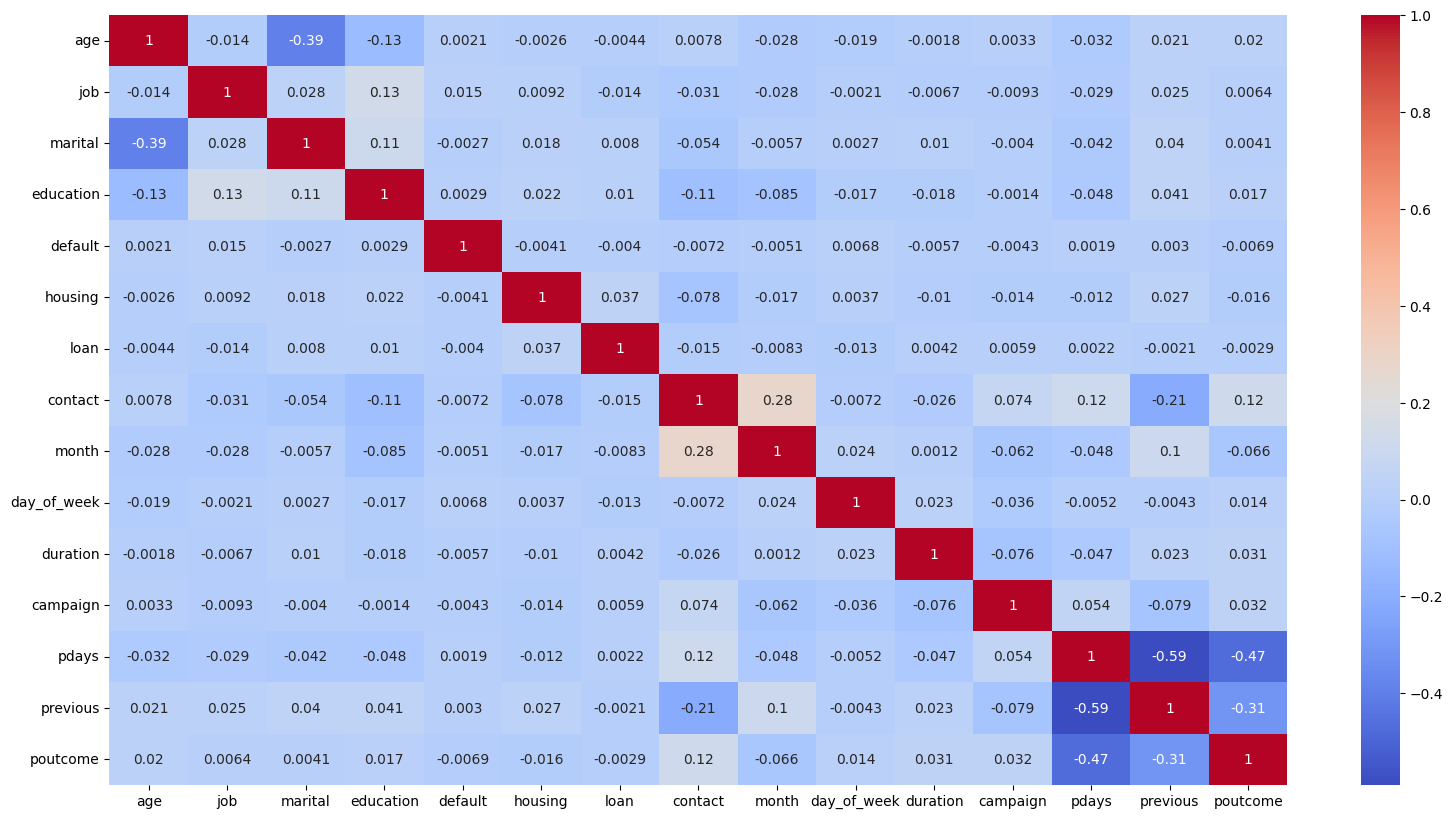

In [63]:
plt.figure(figsize = (19,10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

#Spliting Data into Train and Test


In [66]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [76]:
numeric_columns=[ 'age', 'job', 'marital', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'pdays','poutcome']

In [77]:
# Standardizing features using StandardScaler to transform the training and test sets.
# Standardization ensures that the features have a mean of 0 and a standard deviation of 1, bringing them to a common scale.
sc = StandardScaler()
X_train[numeric_columns]=sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns]=sc.transform(X_test[numeric_columns])

In [78]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
15361,-0.865996,1.789493,1.378888,-0.343930,0,0,0,0,0.766565,-1.431749,-0.962687,-0.204867,0.195979,0,0.194148
5671,1.156631,0.099078,-0.283091,1.098321,0,1,0,0,-1.384681,-0.000896,-0.320591,0.155922,-5.129527,3,2.944151
5882,-1.058628,-0.746130,-0.283091,-0.824680,0,0,0,0,-0.524182,0.714531,-0.032621,0.155922,0.195979,0,0.194148
8597,-0.384418,1.507757,-1.945071,0.617571,0,0,0,0,-1.814930,-0.716322,-0.943229,-0.204867,0.195979,0,0.194148
4448,-0.577050,0.099078,-0.283091,1.098321,0,0,0,0,-1.814930,-1.431749,0.683413,-0.565655,0.195979,0,0.194148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24606,-0.673365,1.507757,1.378888,0.617571,0,1,0,0,-1.384681,-0.000896,-0.713632,-0.204867,0.195979,0,0.194148
11507,-0.577050,-1.027866,-0.283091,0.617571,0,1,0,0,0.336316,-0.000896,1.185415,0.155922,0.195979,1,-2.555854
6563,-0.191787,1.507757,-0.283091,1.098321,0,0,0,1,0.766565,-1.431749,-0.129908,0.516711,0.195979,0,0.194148
18634,0.193475,1.789493,-0.283091,-1.786180,0,1,0,1,0.766565,-1.431749,-0.340049,5.928542,0.195979,0,0.194148


In [79]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
4450,-0.480734,-1.027866,1.378888,1.098321,0,1,0,1,-0.093933,-0.716322,-0.663042,-0.204867,0.195979,0,0.194148
7188,-0.384418,-1.027866,-0.283091,-0.343930,0,0,0,1,0.766565,-0.716322,1.601804,0.155922,0.195979,0,0.194148
27325,-1.829152,-0.746130,-0.283091,-0.824680,0,1,0,0,-0.524182,1.429957,-0.417878,-0.204867,0.195979,0,0.194148
2670,-1.636521,-0.746130,1.378888,1.098321,0,0,0,0,-0.524182,1.429957,4.730560,1.238288,0.195979,0,0.194148
4691,-1.154943,0.944285,1.378888,0.617571,0,0,0,1,0.766565,-0.000896,-0.184389,-0.204867,0.195979,0,0.194148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32185,-0.191787,0.944285,-0.283091,-0.343930,0,0,0,1,0.766565,-1.431749,0.983057,0.155922,0.195979,0,0.194148
11353,-0.191787,1.507757,-0.283091,0.617571,0,0,0,0,0.766565,0.714531,-0.270002,-0.565655,0.195979,0,0.194148
24252,0.482422,-0.746130,-0.283091,-1.786180,0,0,0,1,0.766565,0.714531,-0.624127,1.959866,0.195979,0,0.194148
21923,0.867684,-1.027866,-0.283091,1.098321,0,1,0,1,0.766565,0.714531,0.119147,-0.565655,0.195979,0,0.194148


In [80]:
# Applying SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the target variable.
os=SMOTE(random_state=123)

In [81]:
# Resampling the training data to create synthetic samples for the minority class
X_train,y_train=os.fit_resample(X_train,y_train)

In [82]:
y_train.value_counts()

0    23390
1    23390
Name: y, dtype: int64

In [83]:
#loading the LogisticRegression
lr=LogisticRegression()

In [84]:
lr.fit(X_train,y_train)

LogisticRegression()

In [85]:
y_pred_lr=lr.predict (X_test)

In [86]:
lr_accuracy_score=accuracy_score(y_pred_lr,y_test)
lr_accuracy_score

0.8303490136570562

In [87]:
confusion_matrix(y_pred_lr,y_test)

array([[4940,  210],
       [ 908,  532]])

In [88]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5150
           1       0.72      0.37      0.49      1440

    accuracy                           0.83      6590
   macro avg       0.78      0.66      0.69      6590
weighted avg       0.82      0.83      0.81      6590



In [89]:
#loading the Support Vector Machine
SV=SVC()

In [90]:
SV.fit(X_train,y_train)

SVC()

In [91]:
y_pred_sv=SV.predict(X_test)

In [92]:
svm_accuracy_score=accuracy_score(y_pred_sv,y_test)

In [93]:
svm_accuracy_score

0.8251896813353566

In [94]:
confusion_matrix(y_pred_sv,y_test)

array([[4853,  157],
       [ 995,  585]])

In [95]:
print(classification_report(y_pred_sv,y_test))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5010
           1       0.79      0.37      0.50      1580

    accuracy                           0.83      6590
   macro avg       0.81      0.67      0.70      6590
weighted avg       0.82      0.83      0.80      6590



In [96]:
# loading the random forest
rf=RandomForestClassifier(n_estimators=100)

In [97]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [98]:
y_pred_rf=rf.predict(X_test)

In [99]:
confusion_matrix(y_test,y_pred_rf)

array([[5507,  341],
       [ 323,  419]])

In [100]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5848
           1       0.55      0.56      0.56       742

    accuracy                           0.90      6590
   macro avg       0.75      0.75      0.75      6590
weighted avg       0.90      0.90      0.90      6590



In [101]:
random_accuracy_score=accuracy_score(y_pred_rf,y_test)

In [102]:
random_accuracy_score

0.8992412746585736

In [103]:
#Hyperparameter Tuning
rf_param ={'n_estimators':[10,20,30,40,50],'bootstrap':[True,False]}

In [104]:
#GridSearchCV
gsc=GridSearchCV(estimator=rf,
                 param_grid=rf_param,
                 scoring='accuracy')

In [105]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [106]:
gsc.best_params_

{'bootstrap': False, 'n_estimators': 40}

In [107]:
gsc.best_score_

0.9508550662676358

In [108]:
tuned_rf_model = gsc.best_estimator_
tuned_predictions = tuned_rf_model.predict(X_test)
tuned_accuracy_rf= accuracy_score(y_test, tuned_predictions)
print(classification_report(y_test,tuned_predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5848
           1       0.56      0.50      0.52       742

    accuracy                           0.90      6590
   macro avg       0.75      0.72      0.73      6590
weighted avg       0.89      0.90      0.90      6590



In [109]:
tuned_accuracy_rf

0.8984825493171472

In [110]:
#RandomizedSearchCV
rsc=RandomizedSearchCV(estimator=rf,param_distributions=rf_param,scoring='accuracy',n_iter=3)

In [111]:
rsc.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   scoring='accuracy')

In [112]:
rsc.best_params_

{'n_estimators': 50, 'bootstrap': False}

In [113]:
rsc.best_score_

0.9510902094912355

In [114]:
tuned_rf_model_random = rsc.best_estimator_
tuned_predictions_random = tuned_rf_model_random.predict(X_test)
tuned_accuracy_random_rf = accuracy_score(y_test, tuned_predictions_random)

In [115]:
print(classification_report(y_test, tuned_predictions_random))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5848
           1       0.55      0.50      0.53       742

    accuracy                           0.90      6590
   macro avg       0.75      0.73      0.73      6590
weighted avg       0.89      0.90      0.90      6590



In [116]:
tuned_accuracy_random_rf

0.8981790591805766

In [117]:
# loading the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=123)

In [118]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=123)

In [119]:
y_pred_clf=clf.predict(X_test)

In [120]:
confusion_matrix(y_test,y_pred_clf)

array([[5317,  531],
       [ 374,  368]])

In [121]:
clf_accuracy_score=accuracy_score(y_pred_clf,y_test)

In [122]:
clf_accuracy_score

0.862670713201821

In [123]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      5848
           1       0.41      0.50      0.45       742

    accuracy                           0.86      6590
   macro avg       0.67      0.70      0.69      6590
weighted avg       0.88      0.86      0.87      6590



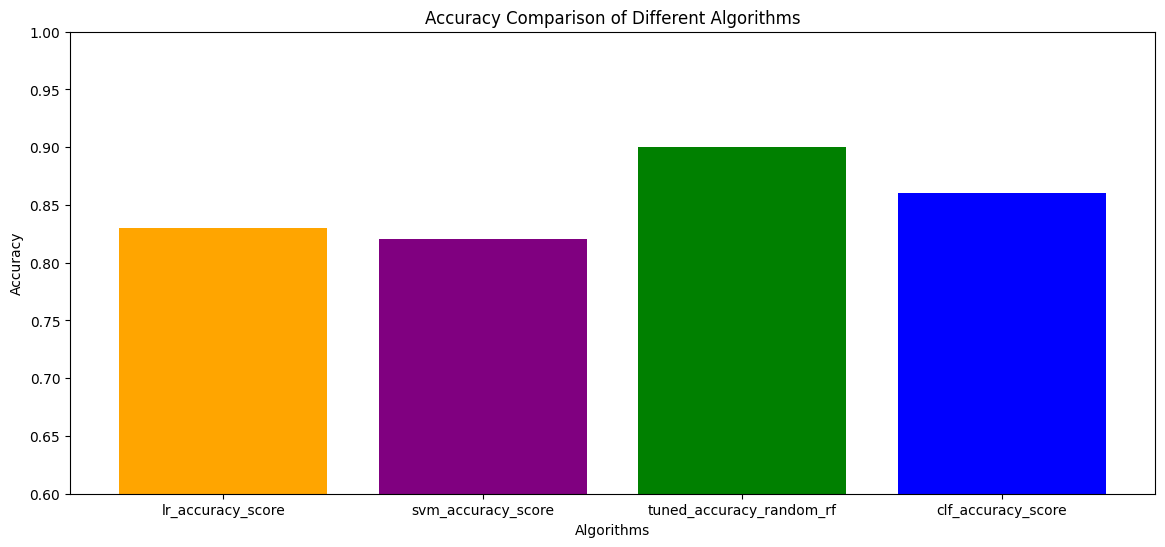

In [124]:
# Comparing the accuracy of different machine learning algorithms using a bar chart.
# Each bar represents the accuracy score achieved by a specific algorithm on a given dataset.
algorithms = ['lr_accuracy_score', 'svm_accuracy_score', 'tuned_accuracy_random_rf', 'clf_accuracy_score']
accuracy_scores = [0.83, 0.82, 0.90, 0.86]
plt.figure(figsize=(14, 6))
plt.bar(algorithms, accuracy_scores, color=['orange', 'purple', 'green', 'blue', 'yellow'])
plt.title('Accuracy Comparison of Different Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

In [125]:
#Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [126]:
# Cross-Validation for Random Forest
rf_cv_scores = cross_val_score(tuned_rf_model_random, X_train, y_train, cv=cv, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores: [0.95553655 0.95607097 0.95489525 0.95564344 0.95158187]
Random Forest Mean Accuracy: 0.9547456177853784


In [ ]:
rf_cv_scores = cross_val_score(tuned_rf_model_random, X_test, y_test, cv=cv, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest Mean Accuracy:", rf_cv_scores.mean())

Random Forest Cross-Validation Scores: [0.89984825 0.90591806 0.89630754 0.89934244 0.89580172]
Random Forest Mean Accuracy: 0.8994436014162874


The best accuracy score we are getting from random forest. The mean accuracy is 0.9547456177853784

In [127]:
test_probabilities = tuned_rf_model_random.predict_proba(X_test)[:, 1]

In [128]:
 #Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)

In [129]:
thresholds

array([2.  , 1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82,
       0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62, 0.6 ,
       0.58, 0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42, 0.4 , 0.38,
       0.36, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22, 0.2 , 0.18, 0.16,
       0.14, 0.12, 0.1 , 0.08, 0.06, 0.04, 0.02, 0.  ])

In [130]:
# Find the Optimal Threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

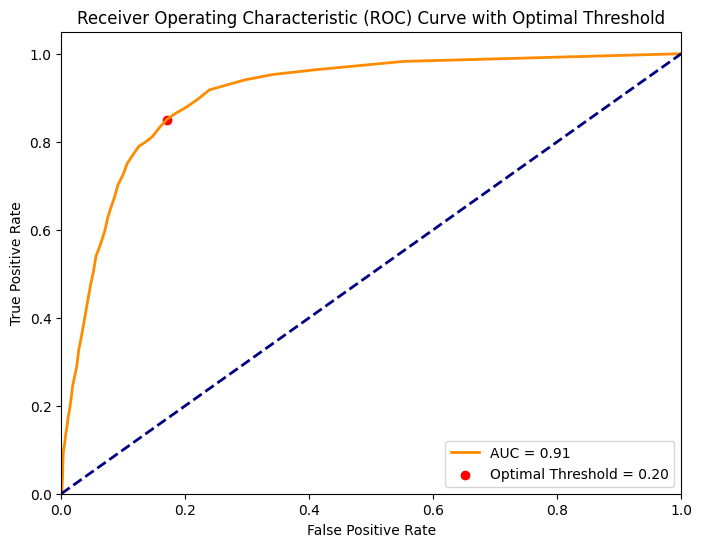

In [131]:
# Plot the ROC Curve with Optimal Threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with Optimal Threshold')
plt.legend(loc="lower right")
plt.show()

In [132]:
print(f"Optimal Threshold: {optimal_threshold:.2f}")

Optimal Threshold: 0.20


In [133]:
tuned_rf_model_random = RandomForestClassifier()
tuned_rf_model_random.fit(X_train, y_train)

RandomForestClassifier()

In [134]:
test_probabilities = tuned_rf_model_random.predict_proba(X_test)[:, 1]

In [135]:
y_pred_thresholded = (test_probabilities > 0.20).astype(int)

In [136]:
y_pred_thresholded

array([0, 1, 0, ..., 0, 0, 1])

In [137]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred_thresholded)
precision

0.37894736842105264

In [138]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_thresholded)
recall

0.8733153638814016

In [139]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_thresholded)
f1

0.5285481239804242

In [140]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_thresholded)
accuracy

0.8245827010622154

In [141]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)
roc_auc = auc(fpr, tpr)
roc_auc

0.9151270644282283